## Практика 5

### Задание 1. Выгрузка и предобработка данных

In [1]:
import time
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import umap.umap_ as umap

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data = df.drop(['output'], axis=1)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
scaller = preprocessing.MinMaxScaler()
data = pd.DataFrame(scaller.fit_transform(data), columns=data.columns)
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Задание 2. Визуализация данных с помощью t-SNE

c:\users\artyom\pycharmprojects\python_7_sem\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\artyom\pycharmprojects\python_7_sem\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\artyom\pycharmprojects\python_7_sem\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\artyom\pycharmprojects\python_7_sem\venv\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\artyom\pycharmprojects\python_7_sem\venv\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from

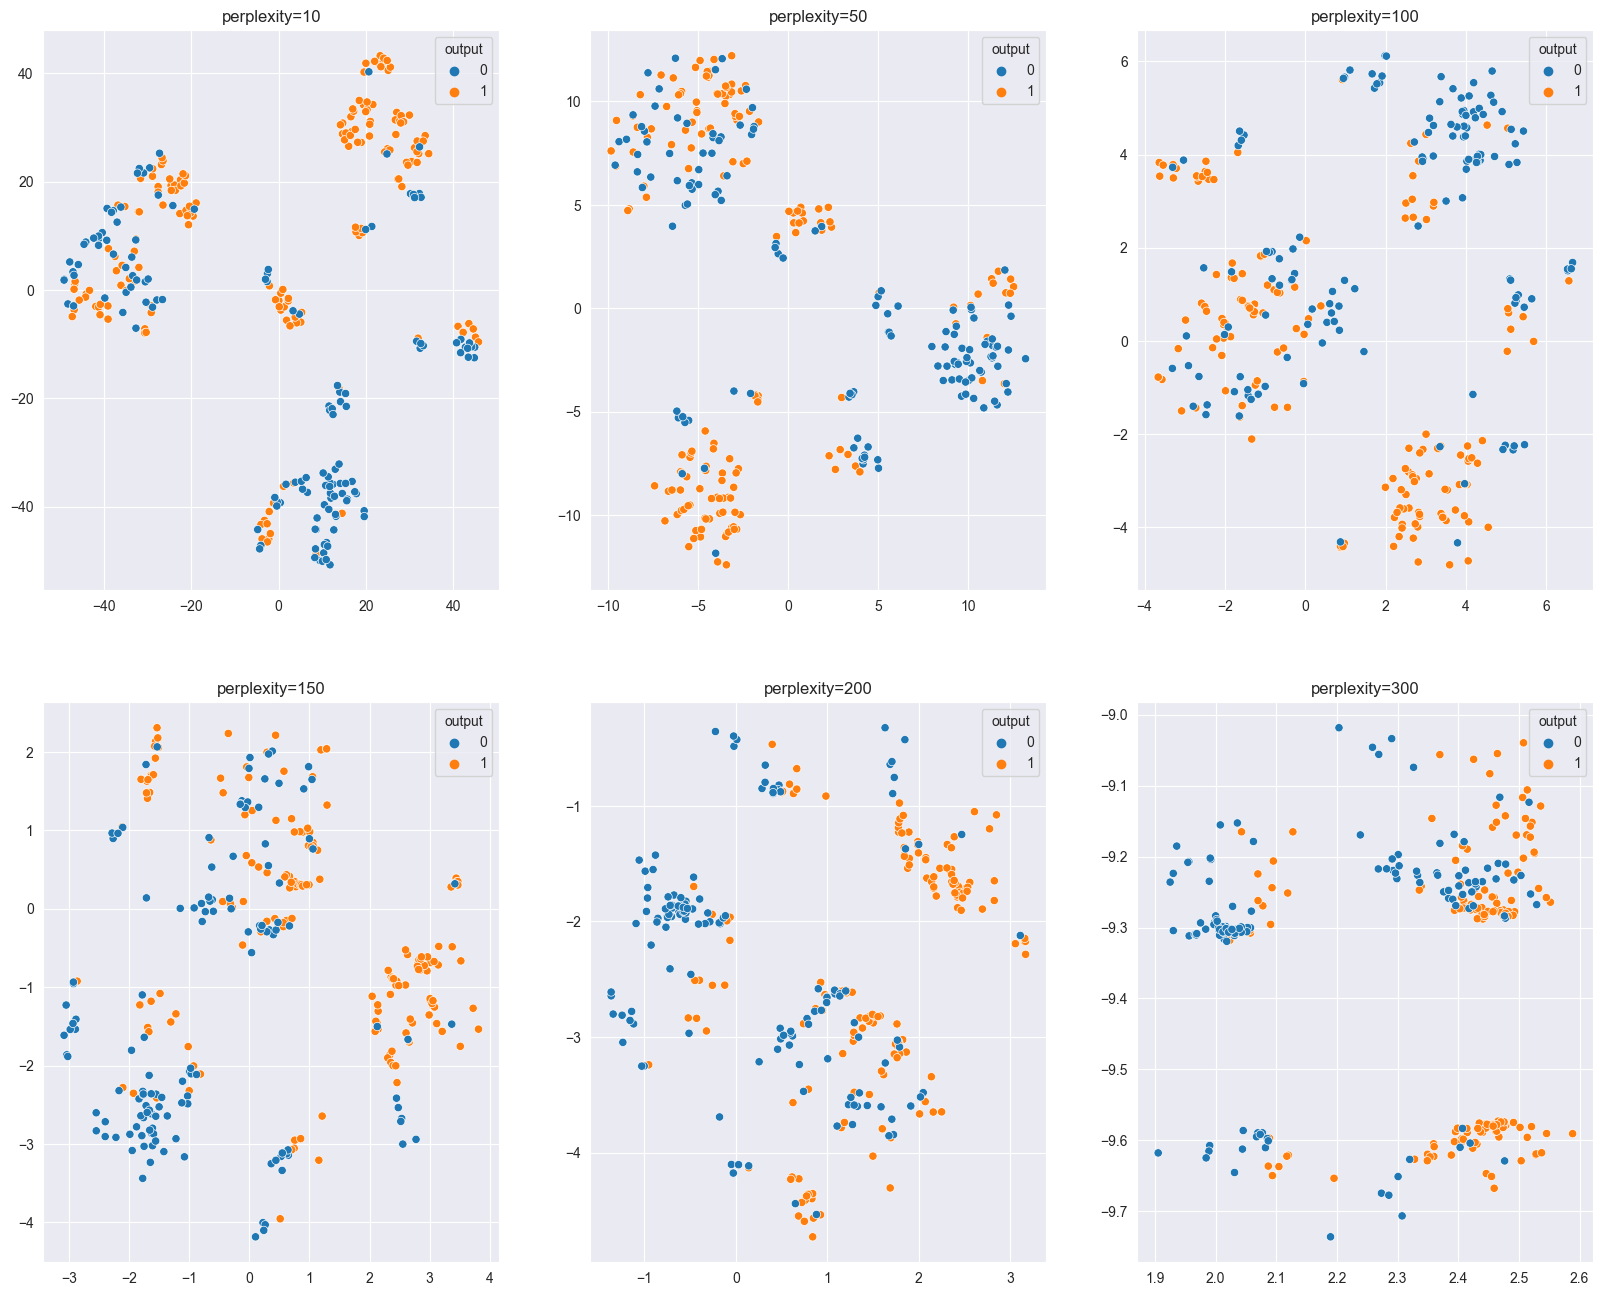

In [6]:
p = [[10, 50, 100],
     [150, 200, 300]]
t = dict()
start_time_sne = time.time()
for i in range(len(p)):
    for j in range(len(p[0])):
        T = TSNE(n_components=2, perplexity=p[i][j])
        t[p[i][j]] = T.fit_transform(data)
end_time_sne = time.time()

fig, ax = plt.subplots(len(p), len(p[0]), figsize=(20,16))
for i in range(len(p)):
    for j in range(len(p[0])):
        sns.scatterplot(ax=ax[i][j], x=t[p[i][j]][:, 0], y=t[p[i][j]][:, 1], hue=df['output'])
        ax[i, j].set_title(f'perplexity={p[i][j]}')
plt.show()

### Задание 3. Визуализация данных с помощью UMAP

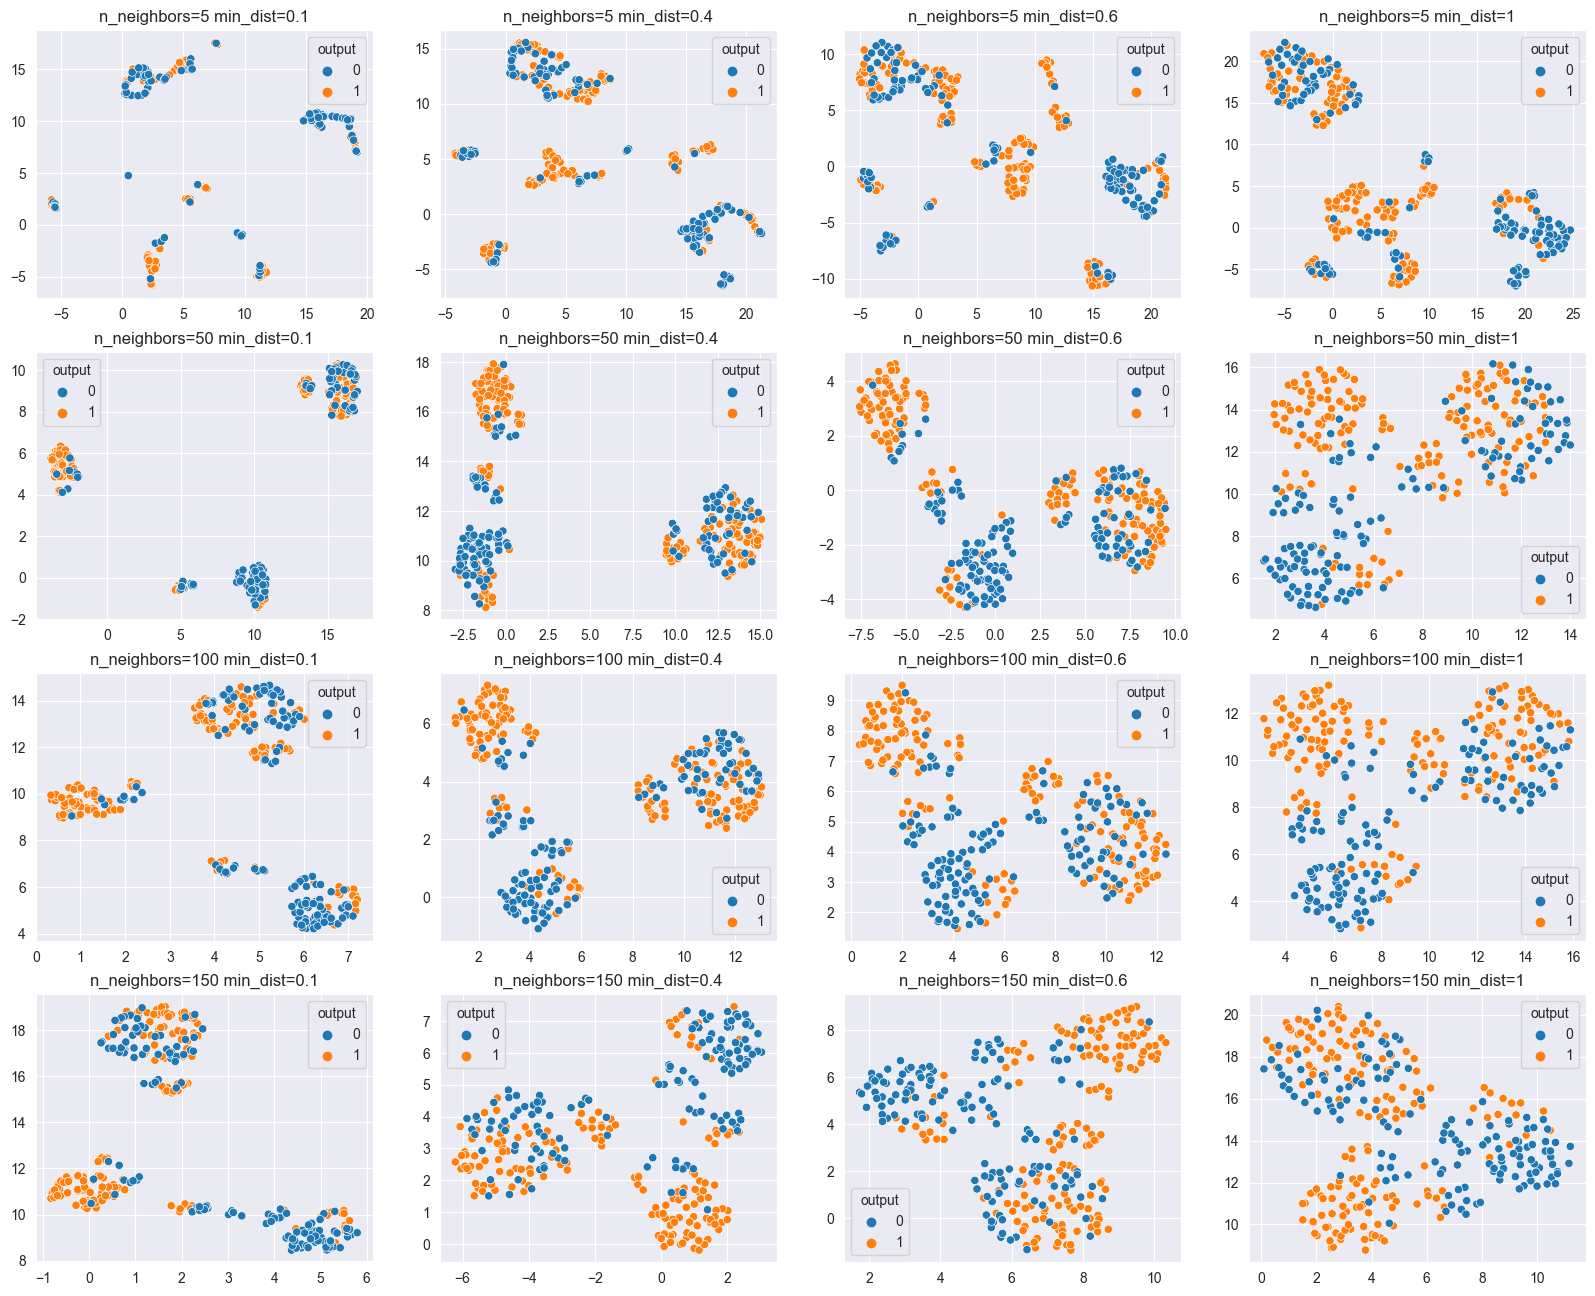

In [7]:
n_n = (5, 50, 100, 150)
m_d = (0.1, 0.4, 0.6, 1)
um = dict()
start_time_umap = time.time()
for i in range(len(n_n)):
    for j in range(len(m_d)):
        um[(n_n[i], m_d[j])]=(umap.UMAP(n_neighbors=n_n[i], min_dist=m_d[j]).fit_transform(data))
end_time_umap = time.time()

fig, ax = plt.subplots(len(n_n), len(m_d), figsize=(20, 16))
for i in range(len(n_n)):
    for j in range(len(m_d)):
        sns.scatterplot(ax=ax[i,j], x=um[n_n[i], m_d[j]][:, 0], y = um[n_n[i], m_d[j]][:, 1 ], hue = df.output)
        ax[i, j].set_title(f'n_neighbors={n_n[i]} min_dist={m_d[j]}')